# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [26]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import roc_auc_score, RocCurveDisplay, roc_curve

In [2]:
from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [3]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [4]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


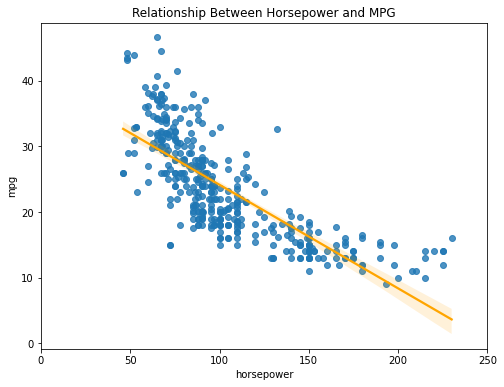

In [5]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us? RSS = SSE

![Slope-RSS relationship image](images/slope-rss-relationship.png)

In [6]:
call_on_students(1)

['Shelley']


#### Answer: 

- graph of cost/loss functions
- predicted values minus actual (squared)
- optimal slope with the minimum error (-.157)

### 2) Imagine that you're starting at a slope towards the top upper left corner. Describe how gradient descent would work.

In [7]:
call_on_students(1)

['Yiyi']


#### Answer: 

- initiate a guess of slope value
- calculate gradient (derivative): this will point in steepest direction of increase
- we need to move in the opposite direction of gradient, to minimize RSS/SSE
- take a step 'down' to make a new guess
- step size determined in part by learning rate
- step size proportional to the gradient
- repeat this until we reach optimal slope value or a stopping criteria
- learning rate = the constant of proportionality, how much the gradient do we take in the step down

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [8]:
call_on_students(1)

['Pat']


#### Answer: 

- How much do we update our guess by? Move down the cost function. 
- small learning might take too long to reach minimum
- large learning rate risk too big of steps and jumping over the optimal value/minimum
- further away from the minimum = larger gradient = larger step size


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [9]:
call_on_students(1)

['Nate']


#### Answer: 

- categorical (classification) as opposed to continuous numeric
- predict the probability of positive class
    -can translate to binary or discrete class predictions based on probability
- linear is for conituous (regression) vs logistic for classification
- logistic regression takes a linear formula (linear reg) and transforms via expit and logit
- harder to directly interpret coefs
- is parametric


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [10]:
call_on_students(1)

['Whitlee']


#### Answer: 

- can predict classes unlike linear regresion (but still linear)
- less prone to overfitting than decision tree (think about logistic regression by default implements regularization)
- need to scale or normalize data for logistic but not for decision tree
- logistic regression more sensitive to outliers than decision trees (because it is linear/distance based)
- decision trees are highly sensitive to class imbalance, logistic less so

## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [11]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [12]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [13]:
call_on_students(1)

['Juvenson']


In [14]:
# Train-test split
# Set test_size=0.33 and random_state=42
y = mpg_class['target']
X = mpg_class.drop('target', axis=1)  # mpg_class.drop(columns=['target'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [15]:
# Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)
X_train_sc

array([[-0.88631438, -0.82964316, -0.46684422, ...,  1.0948266 ,
         1.620831  , -0.68648327],
       [-0.88631438, -0.8773238 , -0.51883707, ...,  0.01094293,
        -0.04231935,  0.54542507],
       [-0.88631438, -0.743818  ,  0.15707001, ...,  0.01094293,
        -0.87389452,  0.54542507],
       ...,
       [-0.88631438, -0.45773416, -0.54483349, ...,  0.74518671,
         0.5120641 , -0.68648327],
       [-0.88631438, -0.96314895, -1.06476201, ...,  1.82907038,
         1.34363928, -0.68648327],
       [ 1.42427634,  1.91676177,  1.1449342 , ..., -0.51351691,
        -0.87389452, -0.68648327]])

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [16]:
call_on_students(1)

['Meg']


#### Part 1: explore the target column breakdown in train data

In [18]:
mpg_class['target'].value_counts()

0    293
1     99
Name: target, dtype: int64

In [19]:
mpg_class['target'].value_counts(normalize=True)

0    0.747449
1    0.252551
Name: target, dtype: float64

In [17]:
# Code to explore
y_train.value_counts()

0    195
1     67
Name: target, dtype: int64

In [20]:
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- we have a class imbalance of sorts


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- Dummy model if we always predicted 0 (most frequent). This model would be ~75% accurate but this is misleading regarding actual model performance.


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [22]:
call_on_students(1)

['Rigat']


#### Answer:

- Problem: class imbalance: not a lot of values for our minority class means the model might have a hard time finding patterns to predict correctly (not enough data for that particular class)
- Oversampling (SMOTE) the minority, undersampling the majority (but we would loss data), we could do a combination as well
- Change evaluation metrics (don't use accuracy, maybe recall or precision)
- Potentially changing threshold
- we can tune the class_weight hyperparameter, can set to 'balanced' to use the breakdown of the class to set proportional weights

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our train and test set

In [24]:
call_on_students(1)

['Katie']


In [25]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_sc, y_train)

LogisticRegression(random_state=42)

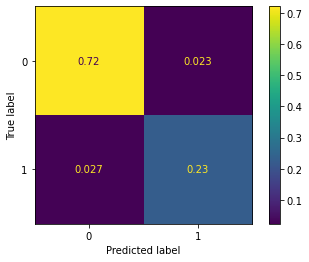

In [31]:
# Plot a confusion matrix on the train data
cm = confusion_matrix(y_train, logreg.predict(X_train_sc), normalize='all')
ConfusionMatrixDisplay(cm).plot();

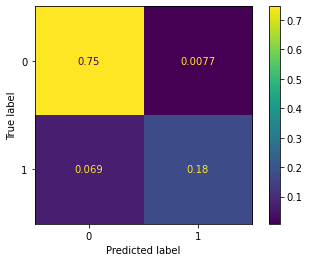

In [32]:
# Plot a confusion matrix on the test data
cm = confusion_matrix(y_test, logreg.predict(X_test_sc), normalize='all')
ConfusionMatrixDisplay(cm).plot();

In [43]:
logreg.predict(X_test_sc)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### 10) Calculate the accuracy, precision, recall and f1-score for the train and test set

You can use the confusion matrix above, or sklearn functions

In [33]:
call_on_students(1)

['Jay']


In [34]:
y_pred_train = logreg.predict(X_train_sc)
y_pred_test = logreg.predict(X_test_sc)

In [35]:
# Wrong
y_pred_train_unscaled = logreg.predict(X_train)
y_pred_train_unscaled == y_pred_train

array([False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True, False, False, False, False,
        True, False, False,  True, False, False, False,  True,  True,
        True, False, False, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False,  True, False, False,  True,  True, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False,  True, False, False,  True,
       False,  True,

In [37]:
# Accuracy
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.950381679389313, 0.9230769230769231)

In [38]:
# Precision
precision_score(y_train, y_pred_train), precision_score(y_test, y_pred_test)

(0.9090909090909091, 0.9583333333333334)

In [40]:
# Recall
recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)

(0.8955223880597015, 0.71875)

In [41]:
# F1-Score
f1_score(y_train, y_pred_train), f1_score(y_test, y_pred_test)

(0.9022556390977443, 0.8214285714285714)

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        98
           1       0.96      0.72      0.82        32

    accuracy                           0.92       130
   macro avg       0.94      0.85      0.89       130
weighted avg       0.93      0.92      0.92       130



### 11) Calculate the ROC-AUC on the train and test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [42]:
call_on_students(1)

['JD']


In [47]:
train_probs = logreg.predict_proba(X_train_sc)[:, 1]
test_probs = logreg.predict_proba(X_test_sc)[:, 1]

In [49]:
# Calculate roc-auc
train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)

fpr_train, tpr_train, thresh_train = roc_curve(y_train, train_probs)
fpr_test, tpr_test, thresh_test = roc_curve(y_test, test_probs)

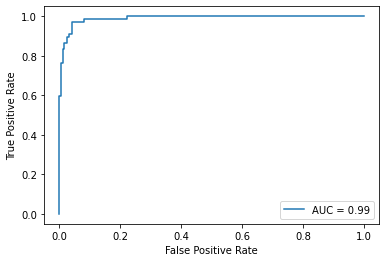

In [52]:
# Plot the ROC curve
RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=train_auc).plot();

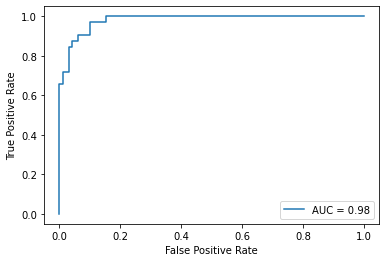

In [53]:
RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=test_auc).plot();

### 12) Evaluate! Based on the metrics of our train and test data, how is our model doing?

In [54]:
call_on_students(1)

['Nathan']


#### Answer:

- model is looking decent, mostly high scores for test, we are overfit on several metrics, in particular recall. Model has more false negatives than we would have liked hense the lower recall score


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [61]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42, criterion='entropy')
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42, criterion='entropy')

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

In [75]:
dt_test = DecisionTreeClassifier(max_depth=2, random_state=42)

In [76]:
dt_test.fit(X_train[['weight', 'origin']], y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

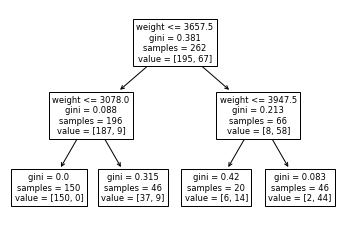

In [77]:
plot_tree(dt_test, feature_names=['weight', 'origin']);

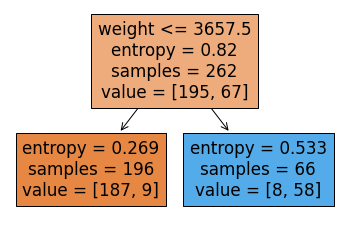

In [62]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

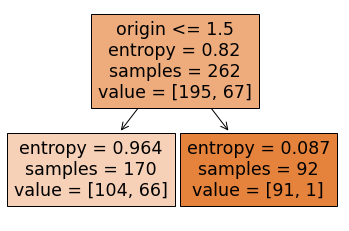

In [63]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- looking for the most 'pure' split
- pure group would be all one class, fully paritioned
- weight is the better split
- paritions the data better

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our train and test set

In [78]:
call_on_students(1)

['Whitlee']


In [79]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=42)

In [80]:
dt_unscaled = DecisionTreeClassifier(random_state=42)

dt_unscaled.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

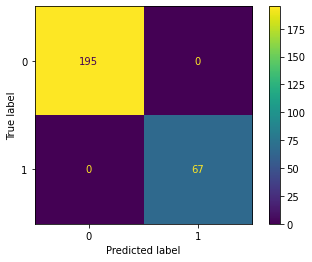

In [82]:
# Plot a confusion matrix on the train data
cm = confusion_matrix(y_train, dt.predict(X_train_sc))
ConfusionMatrixDisplay(cm).plot();

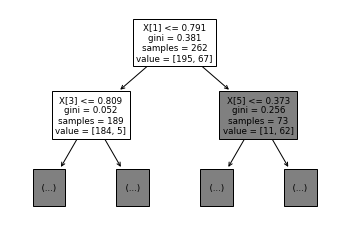

In [89]:
plot_tree(dt, max_depth=1);

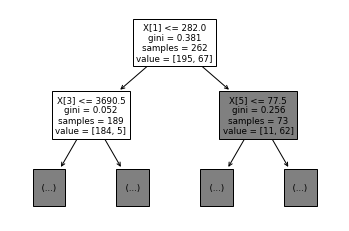

In [91]:
plot_tree(dt_unscaled, max_depth=1);

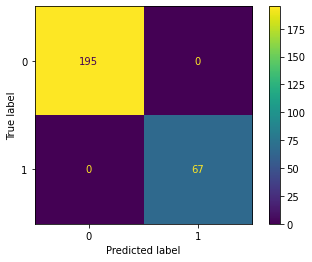

In [84]:
cm = confusion_matrix(y_train, dt_unscaled.predict(X_train))
ConfusionMatrixDisplay(cm).plot();

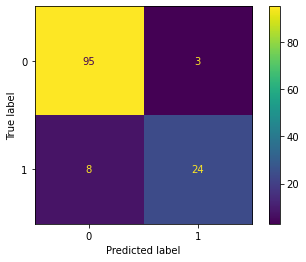

In [92]:
# Plot a confusion matrix on the test data
cm = confusion_matrix(y_test, dt_unscaled.predict(X_test))
ConfusionMatrixDisplay(cm).plot();

In [101]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix

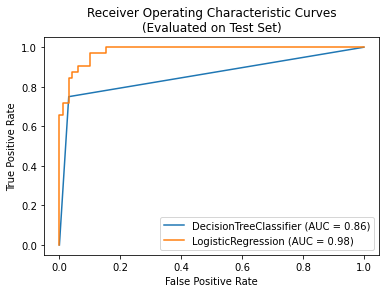

In [96]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test_sc, y_test, ax=ax)
plot_roc_curve(logreg, X_test_sc, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

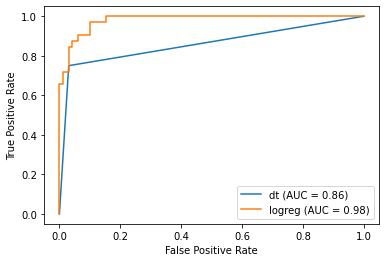

In [100]:
dt_pred_probs = dt.predict_proba(X_test_sc)[:,1]
log_pred_probs = logreg.predict_proba(X_test_sc)[:,1]

fpr1, tpr1, thresh1 = roc_curve(y_test, dt_pred_probs)
fpr2, tpr2, thresh2 = roc_curve(y_test, log_pred_probs)
fig, ax = plt.subplots()
RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc_score(y_test, dt_pred_probs), 
                estimator_name='dt').plot(ax=ax)
RocCurveDisplay(fpr=fpr2, tpr=tpr2, roc_auc=roc_auc_score(y_test, log_pred_probs),
                estimator_name='logreg').plot(ax=ax);

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- logreg is better model. More area, closer to right angle graph. Higher AUC is better. More able to distinguish b/t postive and negative classes.
